In [1]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import seaborn as sns
import pennylane as qml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE




data = pd.read_csv('C:/Users/RDSC/downloads/FLC_labeled_notime.csv', sep=';')

# Display the first few rows of the dataset to understand its structure
print(data.head())






   open  high   low  close    Volume   Volume MA  manipulated
0  4700  4700  4580   4600  15576400  12083646.0            0
1  4520  4600  4480   4490  18797400  12559327.5            0
2  4500  4530  4380   4390  22116400  13069294.0            0
3  4380  4550  4380   4430  13101500  13310592.0            0
4  4480  4550  4430   4440  12386000  13530883.5            0


In [2]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(data)

      open   high    low  close     Volume    Volume MA  manipulated
0     4700   4700   4580   4600   15576400  12083646.00            0
1     4520   4600   4480   4490   18797400  12559327.50            0
2     4500   4530   4380   4390   22116400  13069294.00            0
3     4380   4550   4380   4430   13101500  13310592.00            0
4     4480   4550   4430   4440   12386000  13530883.50            0
5     4510   4750   4470   4750   31098200  14737935.50            0
6     4990   5050   4830   5020   21627800  15488862.00            0
7     5020   5230   4910   4910   26281100  16017379.50            0
8     4900   5010   4780   4930   20222600  16636425.00            0
9     5000   5180   4950   5180   24099200  17462671.00            0
10    5500   5540   5450   5540   22645300  18031849.00            0
11    5700   5700   5160   5280   36892700  19361720.00            0
12    5400   5400   4920   5130   30895700  19608170.50            0
13    5290   5480   5170   5480   

In [3]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 2: Explore the dimensions
print("Number of rows and columns:", df.shape)




Number of rows and columns: (329, 7)


In [4]:

# Step 3: Preview the data
print("Preview of the data:")
print(df.head())



Preview of the data:
   open  high   low  close    Volume   Volume MA  manipulated
0  4700  4700  4580   4600  15576400  12083646.0            0
1  4520  4600  4480   4490  18797400  12559327.5            0
2  4500  4530  4380   4390  22116400  13069294.0            0
3  4380  4550  4380   4430  13101500  13310592.0            0
4  4480  4550  4430   4440  12386000  13530883.5            0


In [5]:
# Step 4: Summary statistics
print("Summary statistics:")
print(df.describe())


Summary statistics:
               open          high           low         close        Volume  \
count    329.000000    329.000000    329.000000    329.000000  3.290000e+02   
mean   11519.635258  11863.221884  11240.151976  11547.142857  2.516072e+07   
std     3288.529935   3387.497811   3185.975218   3278.301777  1.620454e+07   
min     4380.000000   4530.000000   4380.000000   4390.000000  4.404000e+05   
25%    10500.000000  10900.000000  10300.000000  10550.000000  1.502890e+07   
50%    11700.000000  12100.000000  11400.000000  11800.000000  2.237520e+07   
75%    13050.000000  13400.000000  12800.000000  13050.000000  3.129210e+07   
max    23600.000000  24100.000000  21000.000000  22550.000000  1.549412e+08   

          Volume MA  manipulated  
count  3.290000e+02   329.000000  
mean   2.507855e+07     0.085106  
std    6.674348e+06     0.279465  
min    1.208365e+07     0.000000  
25%    2.036324e+07     0.000000  
50%    2.435282e+07     0.000000  
75%    2.948696e+07    

In [6]:

# Step 5: Data types
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
open             int64
high             int64
low              int64
close            int64
Volume           int64
Volume MA      float64
manipulated      int64
dtype: object


In [7]:

# Step 6: Target Variable Analysis
target_variable = 'manipulated'  
target_counts = df[target_variable].value_counts()
print("Target variable distribution:")
print(target_counts)

Target variable distribution:
0    301
1     28
Name: manipulated, dtype: int64


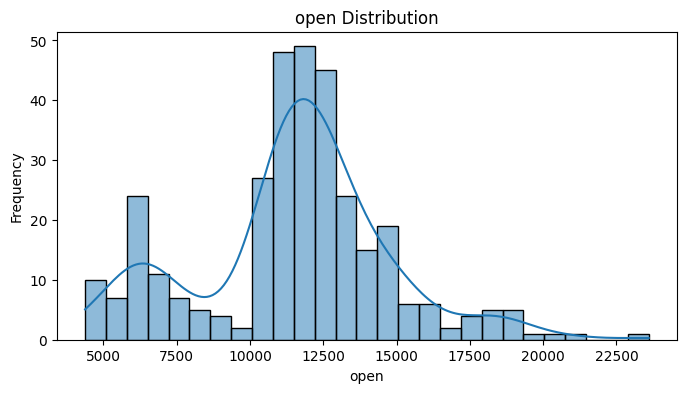

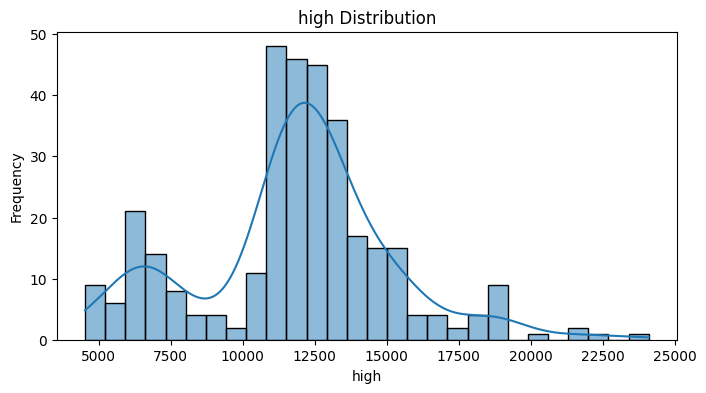

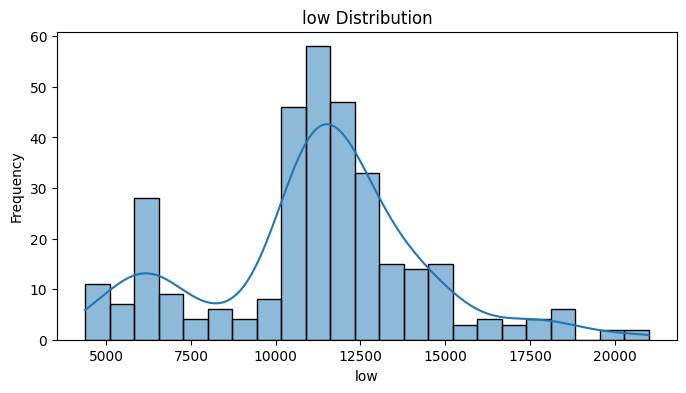

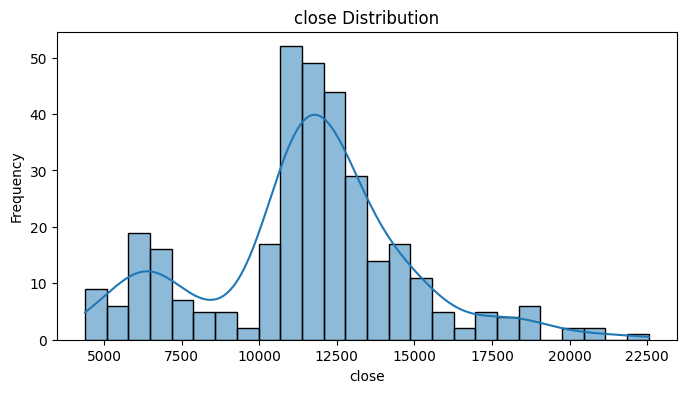

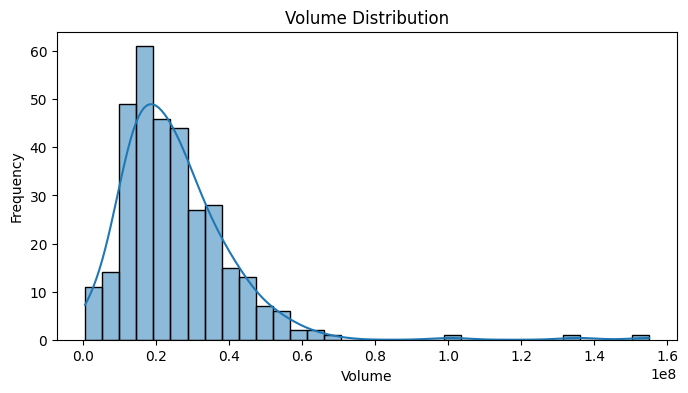

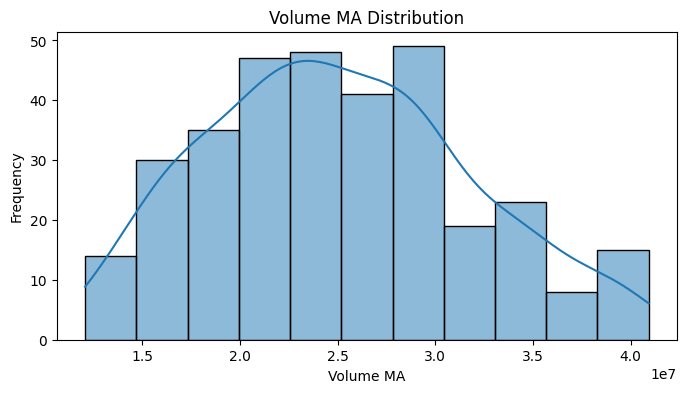

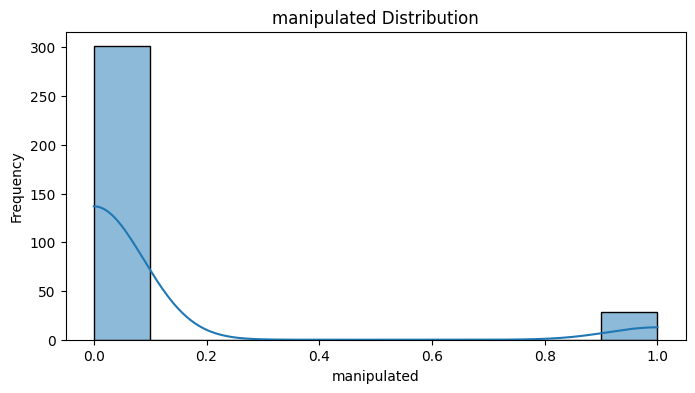

In [8]:

# Step 7: Feature Analysis
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Create histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Create bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature} Counts")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()



In [9]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Step 1: Handling Missing Values (if any)
# Check for missing values in the DataFrame
print(df.isnull().sum())




open           0
high           0
low            0
close          0
Volume         0
Volume MA      0
manipulated    0
dtype: int64


In [10]:
#If there are any missing values, you can impute them with the mean, median, or mode.
# For example, to impute missing values with the mean:
df.fillna(df.mean(), inplace=True)



In [11]:
# Specify the column for which you want to check outliers
column_name = 'manipulated'  

# Calculate the mean and standard deviation of the column
mean = df[column_name].mean()
std = df[column_name].std()

# Define the threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

# Initialize a list to store outliers
outliers = []

# Calculate the z-score for each value in the column and identify outliers
for index, value in df[column_name].iteritems():
    z_score = (value - mean) / std
    if z_score > threshold:
        outliers.append(value)

print('Outliers in the dataset:', outliers)

Outliers in the dataset: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [12]:
# Step 2: Feature Scaling
# Assuming you want to scale the numerical features (open, high, low, close, Volume, Volume MA)
# Drop the 'manipulated' column as it is the target variable
X = df.drop('manipulated', axis=1)
# Separate out the 'manipulated' column as the target variable
y = df['manipulated']



In [13]:
cases = len(data)
nonfraud_count = len(data[data.manipulated == 0])
fraud_count = len(data[data.manipulated == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('Parameters of the data')
print('--------------------------------------------')
print('Total number of cases are', cases)
print('Number of nonfraud_count are', nonfraud_count)
print('Number of fraud_count are',fraud_count)
print('Percentage of fraud cases is' ,fraud_percentage , '%')
print('--------------------------------------------')



nonfraud_cases = data[data.manipulated == 0]
fraud_cases = data[data.manipulated == 1]


Parameters of the data
--------------------------------------------
Total number of cases are 329
Number of nonfraud_count are 301
Number of fraud_count are 28
Percentage of fraud cases is 9.3 %
--------------------------------------------


## Oversampling 

In [14]:

smote = SMOTE(sampling_strategy='auto', random_state= 0)


# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [15]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((481, 6), (121, 6), (481,), (121,))

In [16]:
print("After OverSampling, counts of Target label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of Target label '0': {}".format(sum(y_train == 0)))

print("After OverSampling, counts of Target label '1': {}".format(sum(y_test == 1)))
print("After OverSampling, counts of Target label '0': {}".format(sum(y_test == 0)))

After OverSampling, counts of Target label '1': 241
After OverSampling, counts of Target label '0': 240
After OverSampling, counts of Target label '1': 60
After OverSampling, counts of Target label '0': 61


## Model Building + Training and evaluation

Epoch 1/250
39/39 [==============================] - 1s 14ms/step - loss: 10200714.1491 - accuracy: 0.4922 - val_loss: 9861906.2746 - val_accuracy: 0.5361
Epoch 2/250
39/39 [==============================] - 0s 5ms/step - loss: 9913379.8688 - accuracy: 0.4922 - val_loss: 9581828.9903 - val_accuracy: 0.5361
Epoch 3/250
39/39 [==============================] - 0s 5ms/step - loss: 9622603.7815 - accuracy: 0.4922 - val_loss: 9292355.4776 - val_accuracy: 0.5361
Epoch 4/250
39/39 [==============================] - 0s 5ms/step - loss: 9329910.1875 - accuracy: 0.4922 - val_loss: 9009425.3278 - val_accuracy: 0.5361
Epoch 5/250
39/39 [==============================] - 0s 5ms/step - loss: 9042165.7948 - accuracy: 0.4922 - val_loss: 8723903.3986 - val_accuracy: 0.5361
Epoch 6/250
39/39 [==============================] - 0s 4ms/step - loss: 8752796.5486 - accuracy: 0.4922 - val_loss: 8439835.2185 - val_accuracy: 0.5361
Epoch 7/250
39/39 [==============================] - 0s 5ms/step - loss: 8465263

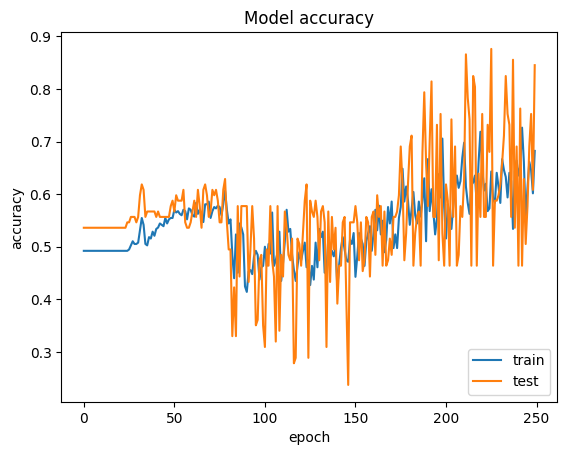

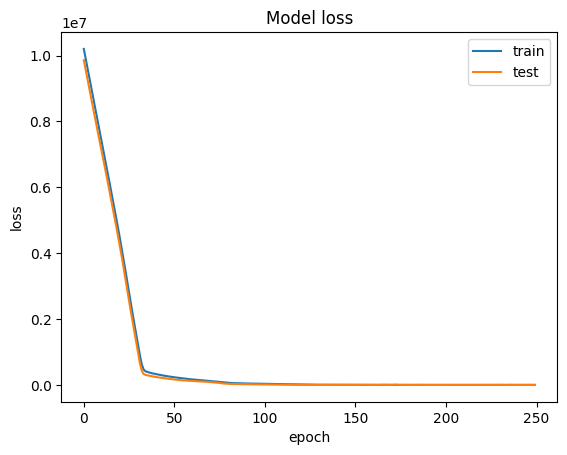

Max val_acc achieved: 87.63 %
Max acc achieved: 72.66 %


In [17]:
num_features = X_train.shape[1]  # Get the number of features from the data



#%% QUANTUM LAYER
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

n_layers = 20
weight_shapes = {"weights": (n_layers, n_qubits)}

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)



#%% CLASSICAL LAYERS + INTEGRATION
tf.keras.backend.set_floatx('float64')


model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(num_features,)))
model.add(Dense(units=1, activation='sigmoid'))





# Use Adam optimizer 
opt = Adam(learning_rate=0.0001)
model.compile(opt, loss="binary_crossentropy", metrics=["accuracy"])

# Increase the number of epochs to allow the model to learn more
#history = model.fit(train_data, train_labels, batch_size=10, epochs=100, validation_data=(train_data, train_labels))
history = model.fit(X_train, y_train, batch_size=10, epochs=250, validation_split=0.2)



#%% EVALUATION
# Plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

print('Max val_acc achieved: %.2f' %(max(history.history['val_accuracy'])*100), '%')
print('Max acc achieved: %.2f' %(max(history.history['accuracy'])*100), '%')


In [18]:
# Evaluate the model on the testing dataset
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
print(classification_report(y_test, np.round(y_pred)))


4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.64      0.76        61
           1       0.72      0.97      0.83        60

    accuracy                           0.80       121
   macro avg       0.84      0.80      0.80       121
weighted avg       0.84      0.80      0.80       121

